# Data Collection

In [ ]:
!pip install tweepy

In [ ]:
!pip install configparser

In [ ]:
import configparser
config= configparser.RawConfigParser()
config.read(filenames='/content/config.ini')
print(config.sections())

In [ ]:
import os
import tweepy as tw
import pandas as pd

In [ ]:
apikey= config.get('twitter','apikey')
accessSecretKey= config.get('twitter','accessSecretKey')
accessToken= config.get('twitter','accessToken')
accessTokenSecret= config.get('twitter','accessTokenSecret')

In [ ]:
auth= tw.OAuthHandler(apikey, accessSecretKey)
auth.set_access_token(accessToken,accessTokenSecret)


api= tw.API(auth)

In [ ]:
search_word= 'github copilot'
date_since= '2020-06-25'

In [ ]:
tweets= tw.Cursor(api.search, q= search_word, lang= 'en').items(1000)

In [ ]:
tweets

In [ ]:
tweets_details= [[tweet.text] for tweet in tweets]
df= pd.DataFrame(tweets_details)

# Data Preprocessing

In [ ]:
import string
import numpy as np

In [ ]:
with open('extracted-tweets.txt','r') as f:
  content= f.readlines()
print(content)

In [ ]:
tweets=[]
for f in file:
  tweet= f.split('"')
  tweets.append(tweet)

print(tweets)

In [ ]:
list=[]
for t in range(0,len(tweets)):
  list.append(tweets[t][0])

print(bool(list[6]))

In [ ]:
import pandas as  pd
tweets_df= pd.DataFrame(list, columns= ['Tweet'])
tweets_df['Tweet'][5]

In [ ]:
tweets_df.tail(10)

In [ ]:
tweets_df['Tweet'].isnull().sum()

In [ ]:
tweets_df['Tweet'].replace('', np.nan, inplace=True)

In [ ]:
tweets_df.dropna(subset=['Tweet'],inplace=True)

In [ ]:
tweets_df.shape

In [ ]:
tweets_df.to_csv('tweets.csv')

## Data

In [1]:
import pandas as pd
df= pd.read_csv('tweets.csv')

In [2]:
df.head(10)

,Unnamed: 0,Tweet
0,0,﻿'
1,1,'#GitHub Copilot is bonkers\n\nhttps://t.co/aM...
2,2,'@luis_in_brief Legal/ethical issues aside.. t...
3,3,"'GitHub Copilot, but for the talking phase. \n..."
4,4,'GitHub CoPilot、kubernetesリソースも扱えちゃうのか。本当にタブ押し...
5,10,'Github-ийн гаргасан Copilot хэр найдвартай вэ...
6,11,'Video with GitHub Copilot and Flutter coming ...
7,13,'Well I’m now in the #GitHubCopilot beta. http...
8,14,'This means that CoPilot ingested content lice...
9,15,"'eu perdi foi tudo com isso aqui, a galera des..."


## basic preprocessing

In [3]:
!pip install contractions

     |████████████████████████████████| 283 kB 8.7 MB/s 
     |████████████████████████████████| 321 kB 71.0 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85445 sha256=b707ca78897e8057cddf22d26c21d4f84a4cbd565dab431c74d0bee607e776f8
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [4]:
#importing libraries

import re #to remove punctuatuion,links, emojis and various others
import contractions #to fix the contractions in sentence
from bs4 import BeautifulSoup #to remove html and xml tags
from collections import Counter #to count most and rare frequent words
import nltk #toolkit for preprocessing
from nltk.tokenize import TweetTokenizer #to tokenise tweets
from nltk.stem import WordNetLemmatizer #to perform lemmatisation
nltk.download('wordnet') 
nltk.download('stopwords')
from nltk.corpus import stopwords #to remove stopwords
import numpy as np #to deal with array
from nltk.corpus import words  #to get all english  words

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# remove new line(\n)
df = df.replace(r'\\n',  ' ', regex=True)

In [6]:
def preprocess(x):
  #Basic Preprocessing of data
  x= x.lower() #lowering sentences
  x= contractions.fix(x) #to expand contractions
  x= " ".join(re.sub("(@[a-zA-Z0-9]+)|(\w+:\/\/\S+)|(#)",' ',x).split()) #removing mentions and hyperlink
  x= BeautifulSoup(x,'lxml').text #removing HTML tags

  #Removing Emojis
  pattern= re.compile(pattern='['
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        ']+',flags= re.UNICODE)
  x= pattern.sub(r' ',x)

  #removing punctuations
  punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'
  x= ''.join(ch for ch in x if ch not in set(punctuation))
  x= ' '.join(re.sub('[^a-zA-Z]',' ',x).split()) #remove all otherthan alpha

  return x

df['Cleaned_tweet']= df['Tweet'].apply(preprocess)

In [7]:
df.head()

,Unnamed: 0,Tweet,Cleaned_tweet
0,0,﻿',
1,1,'#GitHub Copilot is bonkers https://t.co/aMFZ...,github copilot is bonkers
2,2,'@luis_in_brief Legal/ethical issues aside.. t...,inbrief legalethical issues aside the fact tha...
3,3,"'GitHub Copilot, but for the talking phase. ...",github copilot but for the talking phase injec...
4,4,'GitHub CoPilot、kubernetesリソースも扱えちゃうのか。本当にタブ押し...,github copilot kubernetes rt ai


In [8]:
#listing count of words and removing most and rare freq words
cnt = Counter()
for i in range(len(df)):
    for word in df['Cleaned_tweet'][i].split():
        cnt[word] += 1

most_freq= set([w for(w,wc) in cnt.most_common(10)])
rare_freq= set([w for(w,wc) in cnt.most_common()[:-51:-1]])

#removing 50 rare and 10 most frequent words from sentences
def freq_remover(x):
  x= ' '.join([word for word in x.split() if word not in most_freq])
  x= ' '.join([word for word in x.split() if word not in rare_freq])
  return x

df['Cleaned_tweet']= df['Cleaned_tweet'].apply(freq_remover)


In [9]:
df.head()

,Unnamed: 0,Tweet,Cleaned_tweet
0,0,﻿',
1,1,'#GitHub Copilot is bonkers https://t.co/aMFZ...,bonkers
2,2,'@luis_in_brief Legal/ethical issues aside.. t...,inbrief legalethical issues aside fact that go...
3,3,"'GitHub Copilot, but for the talking phase. ...",but for talking phase inject it into my veins
4,4,'GitHub CoPilot、kubernetesリソースも扱えちゃうのか。本当にタブ押し...,kubernetes rt


In [10]:
#tokenising sentences
twtk= TweetTokenizer()
def tokenize(x):
  return twtk.tokenize(x)
df['Cleaned_tweet']= df['Cleaned_tweet'].apply(tokenize)

stopwords= set(stopwords.words('english'))
remove_elmt= ['nor','not','most','against','out','in','once','more','few','only','own','very','too']
updated_list= [words for words in stopwords if words not in remove_elmt]
  
#removing stopwords
def stopwords_remover(x):
  x= ' '.join([word for word in x if word not in updated_list])
  return x

df['Cleaned_tweet']= df['Cleaned_tweet'].apply(stopwords_remover)

In [11]:
df.head()

,Unnamed: 0,Tweet,Cleaned_tweet
0,0,﻿',
1,1,'#GitHub Copilot is bonkers https://t.co/aMFZ...,bonkers
2,2,'@luis_in_brief Legal/ethical issues aside.. t...,inbrief legalethical issues aside fact going s...
3,3,"'GitHub Copilot, but for the talking phase. ...",talking phase inject veins
4,4,'GitHub CoPilot、kubernetesリソースも扱えちゃうのか。本当にタブ押し...,kubernetes rt


In [12]:
#replacing 'nan' at the place of empty strings
df= df.replace(r'^\s*$', np.nan, regex=True)

In [13]:
#dropping all nan values
df= df.dropna()
len(df)

9263

In [14]:
df.head()

,Unnamed: 0,Tweet,Cleaned_tweet
1,1,'#GitHub Copilot is bonkers https://t.co/aMFZ...,bonkers
2,2,'@luis_in_brief Legal/ethical issues aside.. t...,inbrief legalethical issues aside fact going s...
3,3,"'GitHub Copilot, but for the talking phase. ...",talking phase inject veins
4,4,'GitHub CoPilot、kubernetesリソースも扱えちゃうのか。本当にタブ押し...,kubernetes rt
5,10,'Github-ийн гаргасан Copilot хэр найдвартай вэ...,apikey api key


In [15]:
#lemmatising tweets
lemm= WordNetLemmatizer()

def lemmat(x):
  for word in x:
    word= lemm.lemmatize(word)
  return x


df['Cleaned_tweet']= df['Cleaned_tweet'].apply(lemmat)

In [16]:
df.head()

,Unnamed: 0,Tweet,Cleaned_tweet
1,1,'#GitHub Copilot is bonkers https://t.co/aMFZ...,bonkers
2,2,'@luis_in_brief Legal/ethical issues aside.. t...,inbrief legalethical issues aside fact going s...
3,3,"'GitHub Copilot, but for the talking phase. ...",talking phase inject veins
4,4,'GitHub CoPilot、kubernetesリソースも扱えちゃうのか。本当にタブ押し...,kubernetes rt
5,10,'Github-ийн гаргасан Copilot хэр найдвартай вэ...,apikey api key


In [17]:
#removing non-english words
nltk.download('words')
words = set(nltk.corpus.words.words())
def other_lan_remover(x):
  x= "".join(w for w in x \
         if w.lower() in words or not w.isalpha())
  return x

df['Cleaned_tweet']= df['Cleaned_tweet'].apply(other_lan_remover)
df.head()

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


,Unnamed: 0,Tweet,Cleaned_tweet
1,1,'#GitHub Copilot is bonkers https://t.co/aMFZ...,bonkers
2,2,'@luis_in_brief Legal/ethical issues aside.. t...,inbrief legalethical issues aside fact going s...
3,3,"'GitHub Copilot, but for the talking phase. ...",talking phase inject veins
4,4,'GitHub CoPilot、kubernetesリソースも扱えちゃうのか。本当にタブ押し...,kubernetes rt
5,10,'Github-ийн гаргасан Copilot хэр найдвартай вэ...,apikey api key


In [18]:
#replacing 'nan' at the place of empty strings
df= df.replace(r'^\s*$', np.nan, regex=True)

In [19]:
#dropping all nan values
df= df.dropna()
len(df)

9263

## word cloud

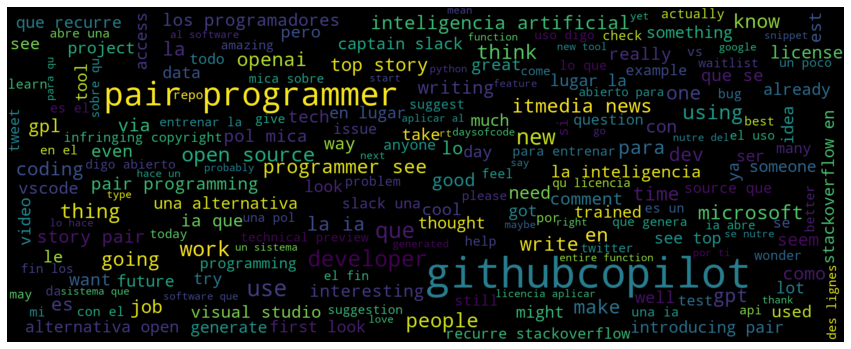

In [20]:
# word cloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allWords = ' '.join([twts for twts in df['Cleaned_tweet']])
wordCloud = WordCloud(width=2000, height=800, random_state=21, max_font_size=100).generate(allWords)

plt.figure(figsize=(15,15))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('copilot_banner.png')

In [21]:
df.head()

,Unnamed: 0,Tweet,Cleaned_tweet
1,1,'#GitHub Copilot is bonkers https://t.co/aMFZ...,bonkers
2,2,'@luis_in_brief Legal/ethical issues aside.. t...,inbrief legalethical issues aside fact going s...
3,3,"'GitHub Copilot, but for the talking phase. ...",talking phase inject veins
4,4,'GitHub CoPilot、kubernetesリソースも扱えちゃうのか。本当にタブ押し...,kubernetes rt
5,10,'Github-ийн гаргасан Copilot хэр найдвартай вэ...,apikey api key


In [20]:
#creating corpus
corpus=[]
def corpus_creation(x):
  return corpus.append(x)
df['Cleaned_tweet'].apply(corpus_creation)
corpus

['bonkers',
 'inbrief legalethical issues aside fact going start using copolite generated in in future training runs implications well product actually work in future talk training bias yeesh',
 'talking phase inject veins',
 'kubernetes rt',
 'apikey api key',
 'video flutter coming soon',
 'well I in githubcopilot beta',
 'means ingested content licensed schrodinger license means needs acknowledge license in work',
 'eu perdi foi tudo com isso aqui galera desesperada pq ia roubar os empregos e sai isso aqui',
 'many contracts years forbidden use cloud services sometimes people think extreme maybe whole thing understand company stopped using atlassian tools eliminated self hosting',
 'salah',
 'olha perigo disso admitindo que pega c digo p blico reposit rios independente da licen',
 'emmet in conflict fix coming turn emmet supposed work turn',
 'la pol mica con el copyright el debate sobre si la ia infringe derechos autor del c digo escrito por otros programadores',
 'found press ente

## word embedding(using bert)

In [1]:
!pip install simpletransformers

     |████████████████████████████████| 221 kB 7.2 MB/s 
     |████████████████████████████████| 1.2 MB 41.2 MB/s 
     |████████████████████████████████| 2.6 MB 50.9 MB/s 
     |████████████████████████████████| 264 kB 62.1 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
     |████████████████████████████████| 8.0 MB 31.2 MB/s 
     |████████████████████████████████| 3.3 MB 57.3 MB/s 
     |████████████████████████████████| 1.8 MB 57.2 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 124 kB 65.9 MB/s 
     |████████████████████████████████| 636 kB 66.3 MB/s 
     |████████████████████████████████| 895 kB 72.5 MB/s 
     |████████████████████████████████| 138 kB 57.9 MB/s 
     |████████████████████████████████| 133 kB 71.6 MB/s 
     |████████████████████████████████| 97 kB 8.7 MB/s 
     |████████████████████████████████| 170 kB 67.2 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |█████████████████

In [22]:

from simpletransformers.language_representation import RepresentationModel
embed= RepresentationModel(model_type='bert', model_name='bert-base-uncased',use_cuda=False)

sentence_vectors= embed.encode_sentences(corpus, combine_strategy='mean')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
#It takes long time to convert sentences into tokens because of which I saved them
import pickle
vectors= open('github_copilot_tweets_vector-07082021.pickle','wb')
pickle.dump(sentence_vectors, vectors)

In [24]:
sentence_vectors.shape

(9263, 768)

## model

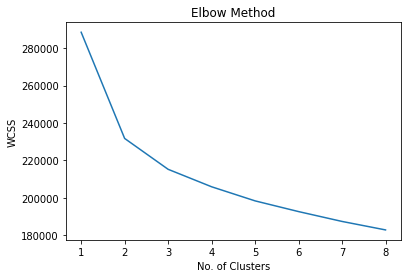

In [25]:
#Elbow method to check for number of Clusters 
from sklearn.cluster import KMeans
wcss= []
for i in range(1,9):
  kmeans= KMeans(n_clusters=i, random_state=42)
  kmeans.fit(sentence_vectors)
  wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1,9),wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [38]:
#taking 2 clusters and fiting data onto model
kmeans= KMeans(n_clusters=2, random_state=42)
labels= kmeans.fit_predict(sentence_vectors)
print(labels)

[1 1 1 ... 1 1 1]


In [39]:
#number of sentences labeled for each Clusters
import numpy as np
print(np.unique(labels,return_counts=True))

(array([0, 1], dtype=int32), array([1581, 7682]))


In [40]:
#Checking last sentence liews in which Cluster
print(df['Tweet'][10438],'is in ',labels[-1]+1,' Cluster')

'Microsoft GitHub Copilot: A.I. offers coding suggestions https://t.co/tzqcxmkJ0L @tnatw'
 is in  2  Cluster


In [41]:
#Calculate Silhouette Score to see distance between points and CLusters
clusters= 2
from sklearn.metrics import silhouette_samples, silhouette_score
silh_avg= silhouette_score(sentence_vectors, labels)
print('For 2 Clusters, the average Silhouette score is ', silh_avg)
sample_silh_values= silhouette_samples(sentence_vectors, labels)

For 2 Clusters, the average Silhouette score is  0.25393504


In [42]:
#for plotting graph of clusters
import matplotlib.cm as cm
import matplotlib.pyplot as plt

For n_clusters = 2 The average silhouette_score is : 0.25393504


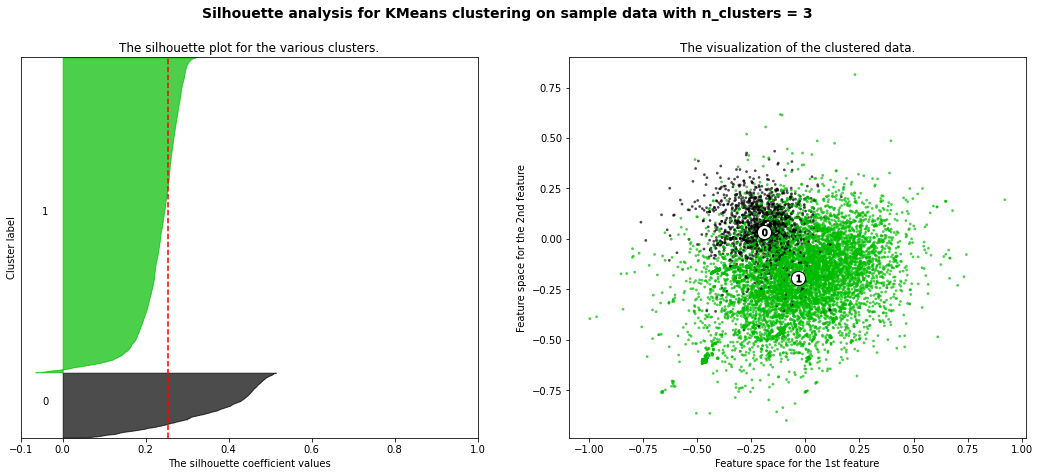

In [45]:
#Printing Silhouette Score and Graph to see the clusters in different color
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(sentence_vectors) + (2 + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(sentence_vectors, labels)
print("For n_clusters =", 2,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(sentence_vectors, labels)

y_lower = 10
for i in range(2):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
    ith_cluster_silhouette_values = \
    sample_silhouette_values[labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(labels.astype(float) / 2)
ax2.scatter(sentence_vectors[:, 0], sentence_vectors[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),
                 fontsize=14, fontweight='bold')

plt.show()

In [46]:
#Saving model
import pickle

with open('model_pickle-f','wb') as f:
  pickle.dump(kmeans,f)

In [52]:
type(labels)

list

In [73]:
#Indexes of Tweet of Cluster 1
l1=[]
for i in range(len(labels)):
  if labels[i]==0:
    l1.append(i)

In [69]:
#Indexes of Tweet of Cluster 2
l2=[]
for i in range(len(labels)):
  if labels[i]==1:
    l2.append(i)